In [1]:
import scalex
from scalex.function import SCALEX
from scalex.plot import embedding
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

/home/hanyuji/miniconda3/envs/SAVE/lib/python3.9/site-packages/scalex/net/vae.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange


In [2]:
sc.settings.verbosity = 3             
sc.settings.set_figure_params(dpi=80, facecolor='white',figsize=(3,3),frameon=True)
sc.logging.print_header()
plt.rcParams['axes.unicode_minus']=False

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.13.0 pandas==2.2.1 scikit-learn==1.4.2 statsmodels==0.14.2 igraph==0.11.4 pynndescent==0.5.12


In [9]:
dataset_path = '/home/hanyuji/Data/scNODE_data/h5ad/'
dataset_name = 'zebrafish_scNODE0_2000genes_3227cells_12tps.h5ad'
adata = sc.read_h5ad(dataset_path+dataset_name)

adata

AnnData object with n_obs × n_vars = 38731 × 2000
    obs: 'n.Genes', 'n.Trans', 'CELL', 'STAGE', 'GENO', 'BATCH', 'SEQ', 'HPF', 'SAMPLE', 'NUM_READS', 'NUM_TRANSCRIPTS', 'NUM_GENES', 'MT_TRANSCRIPTS', 'PERCENT_MT', 'stage.nice', 'tp', 'init', 'Louvain-15', 'Louvain-20', 'Louvain-30', 'ZF6S-Infomap-30', 'ZF6S-Infomap-20', 'ZF6S-Cluster', 'ZF6S-Cluster-Num', 'segment', 'node', 'n_counts_all'
    uns: 'log1p'

In [12]:
adata.obs['batch'] = adata.obs['tp']

In [18]:
l = [1, 6, 12]
subset = adata[adata.obs['batch'].isin(l)]
subset

View of AnnData object with n_obs × n_vars = 5430 × 2000
    obs: 'n.Genes', 'n.Trans', 'CELL', 'STAGE', 'GENO', 'BATCH', 'SEQ', 'HPF', 'SAMPLE', 'NUM_READS', 'NUM_TRANSCRIPTS', 'NUM_GENES', 'MT_TRANSCRIPTS', 'PERCENT_MT', 'stage.nice', 'tp', 'init', 'Louvain-15', 'Louvain-20', 'Louvain-30', 'ZF6S-Infomap-30', 'ZF6S-Infomap-20', 'ZF6S-Cluster', 'ZF6S-Cluster-Num', 'segment', 'node', 'n_counts_all', 'batch'
    uns: 'log1p'

2024-07-18 15:11:19,388 - SCALEX - INFO - Raw dataset shape: (5430, 2000)
2024-07-18 15:11:19,388 - SCALEX - INFO - Raw dataset shape: (5430, 2000)
/home/hanyuji/miniconda3/envs/SAVE/lib/python3.9/site-packages/scalex/data.py:616: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['batch'] = adata.obs['batch'].astype('category')
2024-07-18 15:11:19,402 - SCALEX - INFO - There are 2 batches under batch_name: batch
2024-07-18 15:11:19,402 - SCALEX - INFO - There are 2 batches under batch_name: batch
2024-07-18 15:11:19,404 - SCALEX - INFO - Preprocessing
2024-07-18 15:11:19,404 - SCALEX - INFO - Preprocessing
2024-07-18 15:11:19,406 - SCALEX - INFO - Filtering out MT genes
2024-07-18 15:11:19,406 - SCALEX - INFO - Filtering out MT genes
2024-07-18 15:11:19,428 - SCALEX - INFO - Filtering cells
2024-07-18 15:11:19,428 - SCALEX - INFO - Filtering cells
/home/hanyuji/miniconda3/envs/SAVE/lib/python3.9/site-packages/scanpy/preproc

filtered out 18 genes that are detected in less than 1 cells


2024-07-18 15:11:19,520 - SCALEX - INFO - Normalizing total per cell
2024-07-18 15:11:19,520 - SCALEX - INFO - Normalizing total per cell


normalizing counts per cell
    finished (0:00:00)


2024-07-18 15:11:19,527 - SCALEX - INFO - Log1p transforming
2024-07-18 15:11:19,527 - SCALEX - INFO - Log1p transforming


2024-07-18 15:11:19,533 - SCALEX - INFO - Finding variable features
2024-07-18 15:11:19,533 - SCALEX - INFO - Finding variable features


extracting highly variable genes
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


2024-07-18 15:11:19,671 - SCALEX - INFO - Batch specific maxabs scaling
2024-07-18 15:11:19,671 - SCALEX - INFO - Batch specific maxabs scaling
2024-07-18 15:11:19,703 - SCALEX - INFO - Processed dataset shape: (5430, 1982)
2024-07-18 15:11:19,703 - SCALEX - INFO - Processed dataset shape: (5430, 1982)


Epochs:   0%|          | 0/358 [00:00<?, ?it/s]

2024-07-18 15:35:25,126 - SCALEX - INFO - Plot umap
2024-07-18 15:35:25,126 - SCALEX - INFO - Plot umap


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)


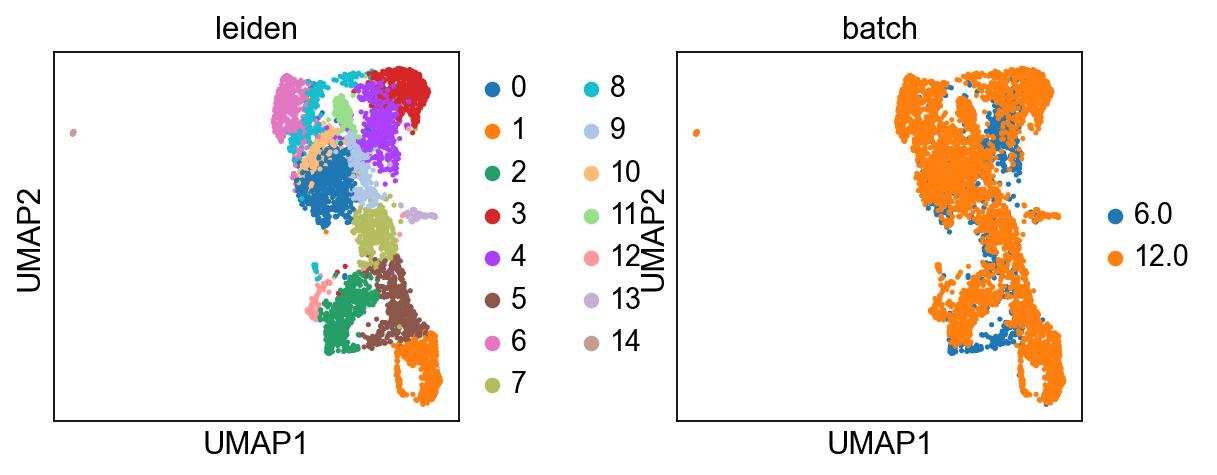

In [19]:
adata_p=SCALEX(subset, batch_name='batch', outdir='pbmc_output_time_series/', min_features=1, min_cells=1,gpu=1)

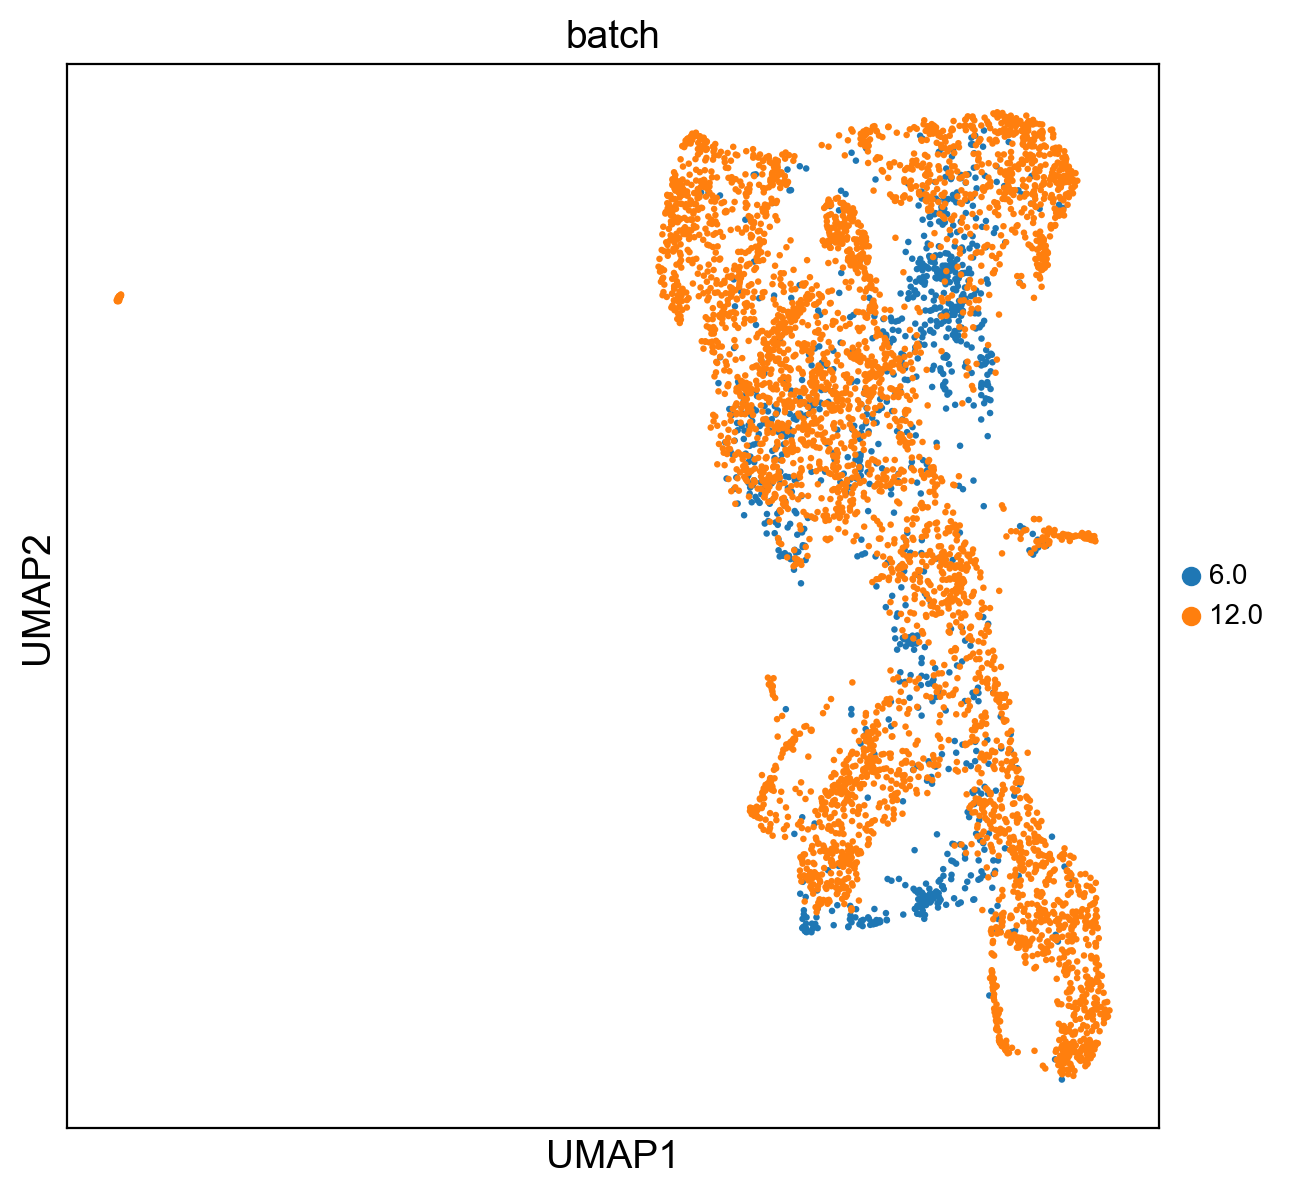

In [21]:
sc.settings.set_figure_params(dpi=100, facecolor='white',figsize=(7,7),frameon=True)
sc.pl.umap(adata_p,color=['batch'],legend_fontsize=10)

In [21]:
adata_p

AnnData object with n_obs × n_vars = 3000 × 1795
    obs: 'chip', 'gene_area', 'slice_index', 'batch', 'n_genes', 'leiden'
    var: 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'batch_colors'
    obsm: 'spatial', 'spatial_raw', 'latent', 'X_umap', 'X_scalex_umap'
    obsp: 'distances', 'connectivities'